## import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

## read dataset

In [2]:
df = pd.read_csv('mobile.csv')
df

,index,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi,price_range
0,0,842.0,no,2.2,one,1,no,7,0.6,188.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,no,button,has wifi,medium low
1,1,1021.0,yes,0.5,dual,0,yes,53,0.7,136.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,yes,touch screen,no wifi,medium high
2,2,563.0,yes,0.5,dual,2,yes,41,0.9,145.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,yes,touch screen,no wifi,medium high
3,3,615.0,yes,2.5,one,0,no,10,0.8,131.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,yes,button,no wifi,medium high
4,4,1821.0,yes,1.2,one,13,yes,44,0.6,141.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,yes,touch screen,no wifi,medium low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,794.0,yes,0.5,dual,0,yes,2,0.8,106.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,yes,touch screen,no wifi,low price
1996,1996,1965.0,yes,2.6,dual,0,no,39,0.2,187.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,yes,touch screen,has wifi,medium high
1997,1997,1911.0,no,0.9,dual,1,yes,36,0.7,108.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,yes,touch screen,no wifi,high
1998,1998,1512.0,no,0.9,one,4,yes,46,0.1,145.0,...,336.0,670.0,869.0,18.0,10.0,19.0,yes,touch screen,has wifi,low price


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          2000 non-null   int64  
 1   battery_power  1996 non-null   float64
 2   blue           1998 non-null   object 
 3   clock_speed    1997 non-null   float64
 4   sim type       1999 non-null   object 
 5   fc             2000 non-null   int64  
 6   four_g         1996 non-null   object 
 7   int_memory     2000 non-null   int64  
 8   m_dep          1995 non-null   float64
 9   mobile_wt      1996 non-null   float64
 10  n_cores        1999 non-null   float64
 11  pc             1996 non-null   float64
 12  px_height      1998 non-null   float64
 13  px_width       1999 non-null   float64
 14  ram            1996 non-null   float64
 15  sc_h           1996 non-null   float64
 16  sc_w           1998 non-null   float64
 17  talk_time      1995 non-null   float64
 18  three_g 

In [4]:
df.drop('index', axis=1, inplace=True)

In [5]:
df.describe()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
count,1996.000000,1997.000000,2000.000000,2000.000000,1995.000000,1996.000000,1999.00000,1996.000000,1998.000000,1999.000000,1996.000000,1996.00000,1998.000000,1995.000000
mean,1238.523547,1.522334,4.309500,32.046500,0.502055,140.265030,4.51976,9.922846,645.181181,1251.786893,2124.963427,12.29509,5.764765,11.012030
std,439.512413,0.816085,4.341444,18.145715,0.288514,35.401066,2.28817,6.064404,443.638043,432.137098,1084.608640,4.20962,4.350645,5.464654
min,501.000000,0.500000,0.000000,2.000000,0.100000,80.000000,1.00000,0.000000,0.000000,500.000000,256.000000,5.00000,0.000000,2.000000
25%,851.750000,0.700000,1.000000,16.000000,0.200000,109.000000,3.00000,5.000000,283.250000,875.500000,1208.750000,9.00000,2.000000,6.000000
50%,1226.000000,1.500000,3.000000,32.000000,0.500000,141.000000,4.00000,10.000000,564.000000,1247.000000,2146.500000,12.00000,5.000000,11.000000
75%,1615.250000,2.200000,7.000000,48.000000,0.800000,170.000000,7.00000,15.000000,946.750000,1633.000000,3066.500000,16.00000,9.000000,16.000000
max,1998.000000,3.000000,19.000000,64.000000,1.000000,200.000000,8.00000,20.000000,1960.000000,1998.000000,3998.000000,19.00000,18.000000,20.000000


## get out numeric features and categorical features

In [6]:
n_col = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]
c_col = [col for col in df.columns if df[col].dtype not in ['int64', 'float64']]

## check outliers

<Axes: >

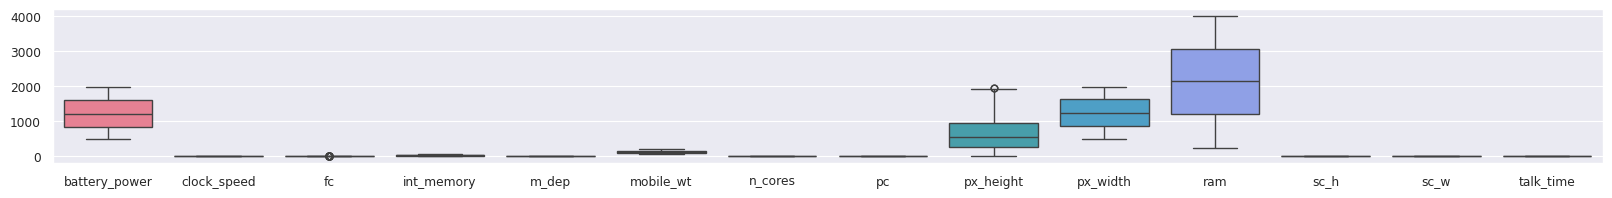

In [7]:
sns.set_theme('paper')
plt.figure(figsize=(20, 2))
sns.boxplot(data= df)

In [8]:
q1 = df[n_col].quantile(0.25)
q3 = df[n_col].quantile(0.75)
iqr = q3 - q1
lower_b = q1 - 1.5 * iqr
upper_b = q3 + 1.5 * iqr
outlier = df[n_col][(df[n_col] < lower_b) | (df[n_col] > upper_b)]

In [9]:
df = df[~outlier.any(axis = 1)]

<Axes: >

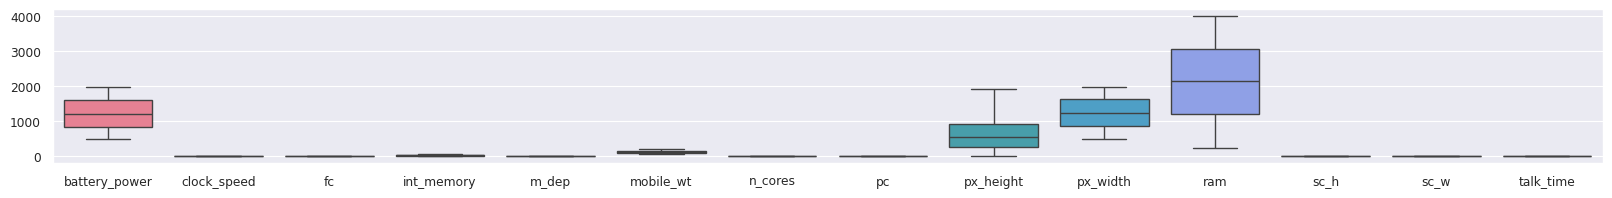

In [10]:
sns.set_theme('paper')
plt.figure(figsize=(20, 2))
sns.boxplot(data= df)

## drop duplicates

In [11]:
df[df.duplicated()]
df.drop_duplicates(inplace=True)

,battery_power,blue,clock_speed,sim type,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,type,wifi,price_range
0,842.0,no,2.2,one,1,no,7,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19.0,no,button,has wifi,medium low
1,1021.0,yes,0.5,dual,0,yes,53,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7.0,yes,touch screen,no wifi,medium high
2,563.0,yes,0.5,dual,2,yes,41,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9.0,yes,touch screen,no wifi,medium high
3,615.0,yes,2.5,one,0,no,10,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11.0,yes,button,no wifi,medium high
4,1821.0,yes,1.2,one,13,yes,44,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15.0,yes,touch screen,no wifi,medium low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794.0,yes,0.5,dual,0,yes,2,0.8,106.0,6.0,...,1222.0,1890.0,668.0,13.0,4.0,19.0,yes,touch screen,no wifi,low price
1996,1965.0,yes,2.6,dual,0,no,39,0.2,187.0,4.0,...,915.0,1965.0,2032.0,11.0,10.0,16.0,yes,touch screen,has wifi,medium high
1997,1911.0,no,0.9,dual,1,yes,36,0.7,108.0,8.0,...,868.0,1632.0,3057.0,9.0,1.0,5.0,yes,touch screen,no wifi,high
1998,1512.0,no,0.9,one,4,yes,46,0.1,145.0,5.0,...,336.0,670.0,869.0,18.0,10.0,19.0,yes,touch screen,has wifi,low price


## check nulls

In [12]:
df.isnull().sum()

battery_power    4
blue             2
clock_speed      3
sim type         1
fc               0
four_g           4
int_memory       0
m_dep            5
mobile_wt        4
n_cores          1
pc               4
px_height        2
px_width         1
ram              4
sc_h             4
sc_w             2
talk_time        5
three_g          1
type             3
wifi             3
price_range      0
dtype: int64

In [13]:
df = df.ffill()

In [14]:
y_data = df['price_range']
x_data = df.drop(columns= 'price_range')

## encode categorical features

In [15]:
enc_y = LabelEncoder()

In [16]:
y_data_enc = enc_y.fit_transform(y_data)

In [1]:
x_data_enc = pd.get_dummies(x_data)

NameError: name 'pd' is not defined

## Modeling

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x_data_enc, y_data_enc, random_state= 2, test_size= 0.2)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Logistic Regression

In [20]:
model1 = LogisticRegression()
model1.fit(x_train, y_train)
model1_pred = model1.predict(x_test)

In [55]:
print(classification_report(y_test, model1_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96        98
           1       0.97      0.98      0.97        94
           2       0.98      0.90      0.94       101
           3       0.95      0.96      0.96       103

    accuracy                           0.96       396
   macro avg       0.96      0.96      0.96       396
weighted avg       0.96      0.96      0.96       396



In [56]:
print('Accuracy : ', accuracy_score(y_test, model1_pred))
print('Precision : ', precision_score(y_test, model1_pred, average= 'weighted'))
print('Recall : ', recall_score(y_test, model1_pred, average= 'weighted'))
print('F1-Score : ', f1_score(y_test, model1_pred, average= 'weighted'))

Accuracy :  0.9570707070707071
Precision :  0.9578572197311586
Recall :  0.9570707070707071
F1-Score :  0.9568342319303991


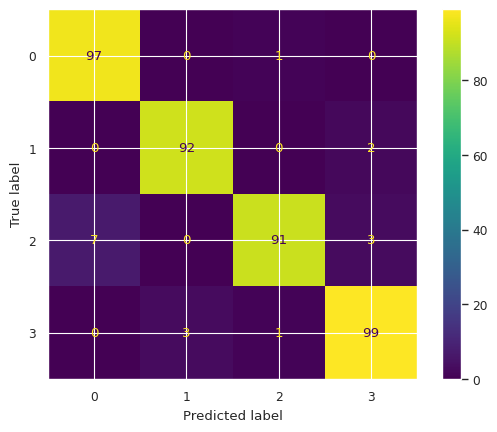

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, model1_pred)

### Decision Tree

In [58]:
model_2 = DecisionTreeClassifier(random_state=2, max_depth= 10)

In [59]:
model_2.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=2)

In [44]:
dt_pred = model_2.predict(x_test)

In [45]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        98
           1       0.91      0.96      0.93        94
           2       0.82      0.75      0.78       101
           3       0.86      0.88      0.87       103

    accuracy                           0.86       396
   macro avg       0.86      0.86      0.86       396
weighted avg       0.86      0.86      0.86       396



In [60]:
print('Accuracy : ', accuracy_score(y_test, dt_pred))
print('Precision : ', precision_score(y_test, dt_pred, average= 'weighted'))
print('Recall : ', recall_score(y_test, dt_pred, average= 'weighted'))
print('F1-Score : ', f1_score(y_test, dt_pred, average= 'weighted'))

Accuracy :  0.8611111111111112
Precision :  0.859638151931905
Recall :  0.8611111111111112
F1-Score :  0.8598388745081977


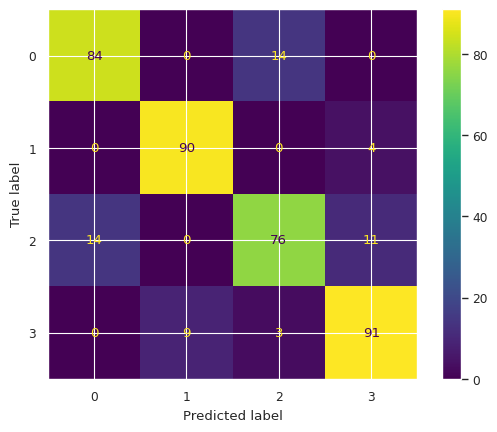

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_pred)

### Svm svc

In [3]:
model_3 = SVC(kernel='linear')
model_3.fit(x_train, y_train)
model_3_y_pred = model_3.predict(x_test)

NameError: name 'SVC' is not defined

In [49]:
print(classification_report(y_test, model_3_y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96        98
           1       0.97      0.99      0.98        94
           2       0.98      0.88      0.93       101
           3       0.95      0.96      0.96       103

    accuracy                           0.95       396
   macro avg       0.96      0.96      0.95       396
weighted avg       0.96      0.95      0.95       396



In [50]:
print('Accuracy : ', accuracy_score(y_test, model_3_y_pred))
print('Precision : ', precision_score(y_test, model_3_y_pred, average= 'weighted'))
print('Recall : ', recall_score(y_test, model_3_y_pred, average= 'weighted'))
print('F1-Score : ', f1_score(y_test, model_3_y_pred, average= 'weighted'))

Accuracy :  0.9545454545454546
Precision :  0.95561648999149
Recall :  0.9545454545454546
F1-Score :  0.9541246990971554


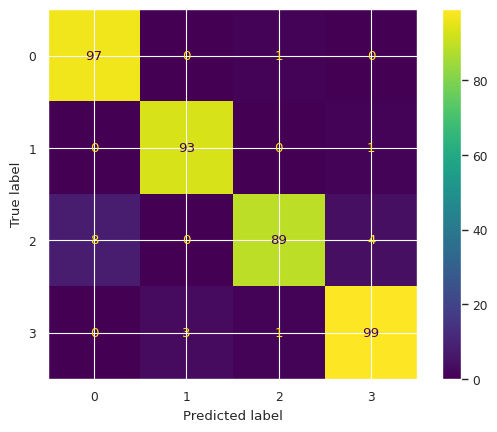

In [51]:
ConfusionMatrixDisplay.from_predictions(y_test, model_3_y_pred)

### Naive Base 

In [52]:
model_4 = GaussianNB()
model_4.fit(x_train, y_train)
naive_pred = model_4.predict(x_test)

In [53]:
print(classification_report(y_test, naive_pred))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88        98
           1       0.94      0.93      0.93        94
           2       0.69      0.67      0.68       101
           3       0.75      0.73      0.74       103

    accuracy                           0.81       396
   macro avg       0.81      0.81      0.81       396
weighted avg       0.80      0.81      0.80       396



In [54]:
print('Accuracy : ', accuracy_score(y_test, naive_pred))
print('Precision : ', precision_score(y_test, naive_pred, average= 'weighted'))
print('Recall : ', recall_score(y_test, naive_pred, average= 'weighted'))
print('F1-Score : ', f1_score(y_test, naive_pred, average= 'weighted'))

Accuracy :  0.8055555555555556
Precision :  0.8041025400507317
Recall :  0.8055555555555556
F1-Score :  0.8045708350240204


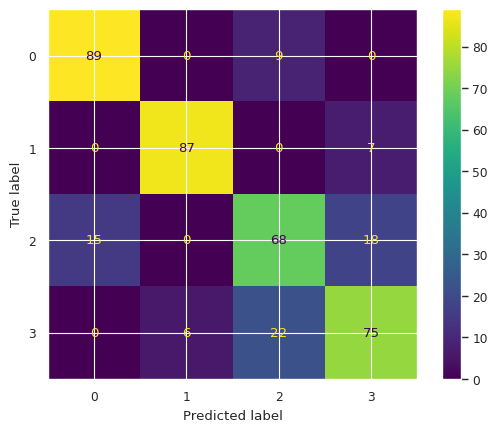

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, naive_pred)